# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Emanuel Rojas ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom:

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

In [331]:
pip install -r "/content/requirements.txt"

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/requirements.txt'


## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [332]:
# Solution
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
BCRP = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD39563DA/json/1922/2021/")
BCRP_data = BCRP.json()
BCRP_data

{'config': {'title': 'PBI Sectorial',
  'series': [{'name': 'PBI Sectorial - PBI (Mill S/ 2007)', 'dec': '0'}]},
 'periods': [{'name': '1922', 'values': ['14122.0322219965']},
  {'name': '1923', 'values': ['14756.217373401']},
  {'name': '1924', 'values': ['16069.7988061845']},
  {'name': '1925', 'values': ['16575.1994730273']},
  {'name': '1926', 'values': ['18130.1930941889']},
  {'name': '1927', 'values': ['18686.5803772776']},
  {'name': '1928', 'values': ['19690.2907641301']},
  {'name': '1929', 'values': ['22169.3361005263']},
  {'name': '1930', 'values': ['20064.6268356107']},
  {'name': '1931', 'values': ['18739.2107900484']},
  {'name': '1932', 'values': ['18130.0703142981']},
  {'name': '1933', 'values': ['20080.8982502038']},
  {'name': '1934', 'values': ['22631.9919031546']},
  {'name': '1935', 'values': ['24635.4496176484']},
  {'name': '1936', 'values': ['25821.4863767546']},
  {'name': '1937', 'values': ['26321.8856838524']},
  {'name': '1938', 'values': ['26849.89711411

In [333]:
BCRP_data.keys()

dict_keys(['config', 'periods'])

In [334]:
import pandas as pd
titulo = BCRP_data["config"]["series"][0]["name"]
titulo

'PBI Sectorial - PBI (Mill S/ 2007)'

In [335]:
datos = BCRP_data["periods"]

In [336]:
Fechas =[]
PBI = []

In [337]:
for element in datos:
  Fechas.append(element["name"])
  PBI.append(element["values"])


In [338]:
PBI_nuevo = {"Fecha": Fechas, "PBI (Mill S/)": PBI}
PBI_df = pd.DataFrame(PBI_nuevo)
PBI_df

,Fecha,PBI (Mill S/)
0,1922,[14122.0322219965]
1,1923,[14756.217373401]
2,1924,[16069.7988061845]
3,1925,[16575.1994730273]
4,1926,[18130.1930941889]
...,...,...
95,2017,[514215]
96,2018,[534665]
97,2019,[546605]
98,2020,[486402.0862783]


In [339]:
PBI_df["PBI (Mill S/)"] = PBI_df['PBI (Mill S/)'].apply(lambda x: float(x[0]))

In [340]:
PBI_df['PBI (Mill S/)'] = PBI_df['PBI (Mill S/)'].round(2)

In [341]:
PBI_df

,Fecha,PBI (Mill S/)
0,1922,14122.03
1,1923,14756.22
2,1924,16069.80
3,1925,16575.20
4,1926,18130.19
...,...,...
95,2017,514215.00
96,2018,534665.00
97,2019,546605.00
98,2020,486402.09


In [342]:
nuevas_filas = pd.DataFrame({
    'Fecha': [2022, 2023],
    'PBI (Mill S/)': [567224.588, 572896.834]
})

PBI_df = PBI_df.append(nuevas_filas, ignore_index=True)
PBI_df

<ipython-input-342-7a6c46666375>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PBI_df = PBI_df.append(nuevas_filas, ignore_index=True)


,Fecha,PBI (Mill S/)
0,1922,14122.030
1,1923,14756.220
2,1924,16069.800
3,1925,16575.200
4,1926,18130.190
...,...,...
97,2019,546605.000
98,2020,486402.090
99,2021,552312.160
100,2022,567224.588


In [343]:
PBI_df['Variacion%'] = ((PBI_df['PBI (Mill S/)'] / PBI_df['PBI (Mill S/)'].shift(1)) - 1) * 100
PBI_df['Variacion%'] = PBI_df['Variacion%'].round(2)

In [344]:
PBI_df

,Fecha,PBI (Mill S/),Variacion%
0,1922,14122.030,NaN
1,1923,14756.220,4.49
2,1924,16069.800,8.90
3,1925,16575.200,3.15
4,1926,18130.190,9.38
...,...,...,...
97,2019,546605.000,2.23
98,2020,486402.090,-11.01
99,2021,552312.160,13.55
100,2022,567224.588,2.70


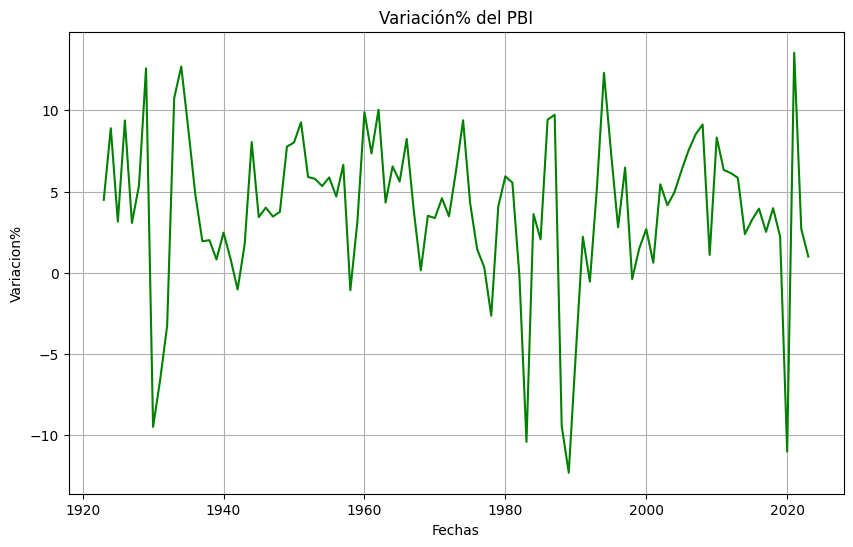

In [345]:
import matplotlib.pyplot as plt
PBI_df['Fecha'] = pd.to_numeric(PBI_df['Fecha'])
PBI_df['Variacion%'] = pd.to_numeric(PBI_df['Variacion%'])

plt.figure(figsize=(10,6))
plt.plot(PBI_df['Fecha'], PBI_df['Variacion%'], color='green')
plt.xlabel('Fechas')
plt.ylabel('Variacion%')
plt.title('Variación% del PBI')
plt.grid(True)
plt.show()

In [346]:
# Como se puede observar. El PBI tiene un rango de variación entre -10 y 10% a lo largo del tiempo. En la última década hemos sufrido el efecto de la pandemia
# que fue reflejado en el 2020, en el cual hubo una gran disminución del PBI. Sin embargo en 2021 logramos retomar el crecimiento.
# A pesar de ello, actualmente nos encontramos en recesión puesto que la variación se acerca a cero. Esto producto del efecto de la subida de las tasas de interés
# de referencias de la FED y el BCRP.

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended.
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [347]:
# Solution


## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s
`Ticker()`
- Hint2: some firms may not be paying dividends

In [348]:
import yfinance as yf
empresas = [
{"ticker": "AAPL", "sector": "Tecnología"},
{"ticker": "MSFT", "sector": "Tecnología"},
{"ticker": "GOOG", "sector": "Tecnología"},
{"ticker": "LLY", "sector": "Salud"},
{"ticker": "UNH", "sector": "Salud"},
{"ticker": "NVO", "sector": "Salud"},
{"ticker": "HSBC", "sector": "Finanzas"},
{"ticker": "BRK/A", "sector": "Finanzas"},
{"ticker": "JPM", "sector": "Finanzas"}]

In [349]:
tecnologia = pd.DataFrame()
for empresa in empresas:
    if empresa["sector"] == "Tecnología":
        ticker = yf.Ticker(empresa["ticker"])
        holders = ticker.institutional_holders
        holders["sector"] = empresa["sector"]
        tecnologia = tecnologia.append(holders)
tecnologia = tecnologia.groupby("Holder")["sector"].count().sort_values(ascending=False)
tecnologia.head(3)

<ipython-input-349-055043f63833>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tecnologia = tecnologia.append(holders)
<ipython-input-349-055043f63833>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tecnologia = tecnologia.append(holders)
<ipython-input-349-055043f63833>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tecnologia = tecnologia.append(holders)


Holder
Blackrock Inc.                   3
FMR, LLC                         3
Geode Capital Management, LLC    3
Name: sector, dtype: int64

In [350]:
salud = pd.DataFrame()
for empresa in empresas:
    if empresa["sector"] == "Salud":
        ticker = yf.Ticker(empresa["ticker"])
        holders2 = ticker.institutional_holders
        holders2["sector"] = empresa["sector"]
        salud = salud.append(holders2)
salud = salud.groupby("Holder")["sector"].count().sort_values(ascending=False)
salud.head(3)

<ipython-input-350-5aec27b5736e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salud = salud.append(holders2)
<ipython-input-350-5aec27b5736e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salud = salud.append(holders2)
<ipython-input-350-5aec27b5736e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salud = salud.append(holders2)


Holder
Price (T.Rowe) Associates Inc    3
FMR, LLC                         3
Capital World Investors          2
Name: sector, dtype: int64

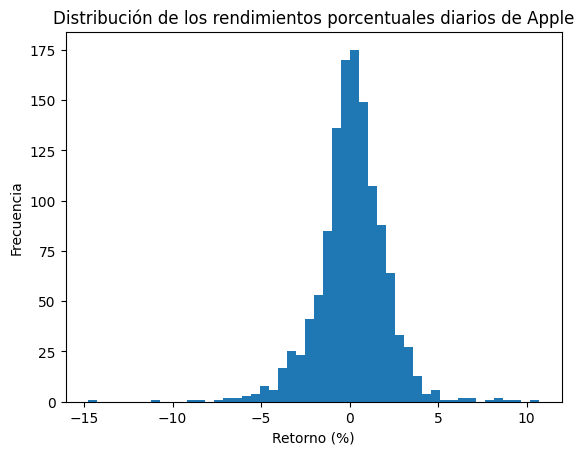

In [351]:
apple = yf.Ticker("AAPL")
historia = apple.history(period="5y")
historia["retorno"] = ((historia["Close"] - historia["Close"].shift(1))/historia["Close"])*100 + historia["Dividends"]
plt.hist(historia["retorno"], bins=50)
plt.title("Distribución de los rendimientos porcentuales diarios de Apple")
plt.xlabel("Retorno (%)")
plt.ylabel("Frecuencia")
plt.show()

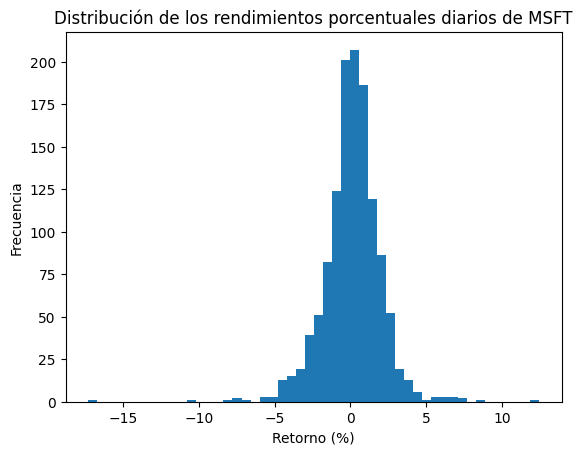

In [352]:
microsoft = yf.Ticker("MSFT")
historia2 = microsoft.history(period="5y")
historia2["retorno"] = ((historia2["Close"] - historia2["Close"].shift(1))/historia2["Close"])*100 + historia2["Dividends"]
plt.hist(historia2["retorno"], bins=50)
plt.title("Distribución de los rendimientos porcentuales diarios de MSFT")
plt.xlabel("Retorno (%)")
plt.ylabel("Frecuencia")
plt.show()

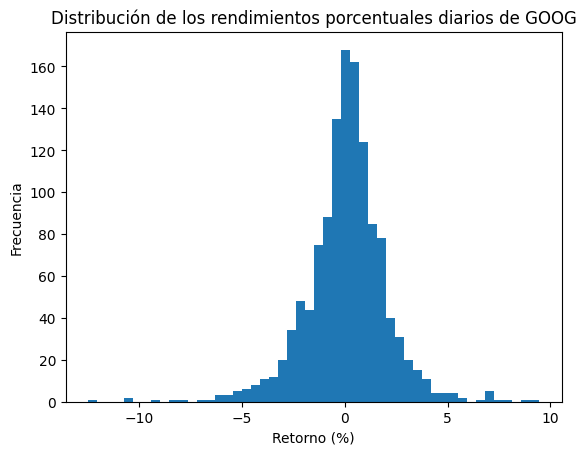

In [353]:
google = yf.Ticker("GOOG")
historia3 = google.history(period="5y")
historia3["retorno"] = ((historia3["Close"] - historia3["Close"].shift(1))/historia3["Close"])*100 + historia3["Dividends"]
plt.hist(historia3["retorno"], bins=50)
plt.title("Distribución de los rendimientos porcentuales diarios de GOOG")
plt.xlabel("Retorno (%)")
plt.ylabel("Frecuencia")
plt.show()

In [354]:
# Se puede observar que en promedio las 3 empresas con mayor cap ofrecen un rendimiento al rededor de 0% diario.
# Asimismo, los dueños de los titulares institucionales que más comentan sobre el sector son justamente
# lo que tienen gran participación en acciones de empresas del sector que promocionan
